In [1]:
import os
import tweepy as tw
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
consumer_key= 'dTJ4xUIjHdzdlbC3c7aYkRB7u'
consumer_secret= 'By06edJOS16zSdLCsGvm1coPDw5stKRURotsaFEDsfRmwoxLYm'
access_token= '841582139179171840-RE9IqBQDGJlb8t9PEUs5hEaBMWkuZxY'
access_token_secret= 'FhSBzo1nTYAVWGBb05b34aoSVsb17Fvb4bc7gac9GScNt'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
tweets_df2=pd.read_csv("AirIndia_final1.csv")

In [5]:
tweets_df2.head()

,Unnamed: 0,Tweet_Text,created,Twitter_screenname,Followers,id,location
0,0,@hemendu @JM_Scindia @PMOIndia @airindiain @AA...,2022-05-07 15:00:21+00:00,Krishan48622838,0,1.520000e+18,PANCHKULA
1,1,"Heard a lot about @airindiain, reason to have ...",2022-05-07 14:56:43+00:00,Akkumar_,77,1.520000e+18,#Delhi_India_Earth
2,2,RT @Dastanagoi: Pathetic service of @makemytri...,2022-05-07 14:55:20+00:00,haakubaarajesha,1,1.520000e+18,"Bengaluru, India"
3,3,@virsanghvi @airindiain @IndiGo6E @TataCompani...,2022-05-07 14:46:01+00:00,HumSaoEkHein,7,1.520000e+18,NaN
4,4,RT @madhukishwar: Surprised that @AirIndia beh...,2022-05-07 13:59:04+00:00,gautam18381,169,1.520000e+18,NaN


In [6]:
import nltk
import re

In [7]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
#Adding custom stop words
new_words=[]
new_words = ["dear","mr","airindia","air","ai","india","jm","hemendu","scindia","nan","airvistara","vistara","th","air","rt","airindiain","nmi","mkarthi","deepigoyal","gpwt","rt","zomato","zomatocare","some","one","like","time","br","movie","film","could","good",'even', 'get', 'would',
             'make', 'really', 'see', 'well', 'much', 'great', 'first', 'people', 'also', 
             'show', 'way', 'thing', 'made', 'go', 'think', 'know', 'watch','look','many', 'co','http', 'amp']
stop_words = stop_words.union(new_words)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ai',
 'ain',
 'air',
 'airindia',
 'airindiain',
 'airvistara',
 'all',
 'also',
 'am',
 'amp',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 'co',
 'could',
 'couldn',
 "couldn't",
 'd',
 'dear',
 'deepigoyal',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'even',
 'few',
 'film',
 'first',
 'for',
 'from',
 'further',
 'get',
 'go',
 'good',
 'gpwt',
 'great',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'hemendu',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'http',
 'i',
 'if',
 'in',
 'india',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'jm',
 'just',
 'know',
 'like',
 'll',
 'look',
 'm',
 'ma',
 'mad

In [8]:
#Stemming words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
#Lemmatisation
from nltk.stem.wordnet import WordNetLemmatizer 
lm = WordNetLemmatizer() 

In [9]:
type(tweets_df2['Tweet_Text'][0])

str

In [10]:
corpus = []
for i in range(0, tweets_df2.shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(tweets_df2['Tweet_Text'][i]))
    
    #Convert to lowercase
    text = text.lower()
    ##Convert to list from string
    text = text.split()
    ##Lemmatizing
    lm = WordNetLemmatizer() 
       
    
    text = [lm.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
#ignore words that appear in 80% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, ngram_range=(1,2), min_df=0.001)
X=cv.fit_transform(corpus)
vector = cv.transform(corpus)

In [13]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [14]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

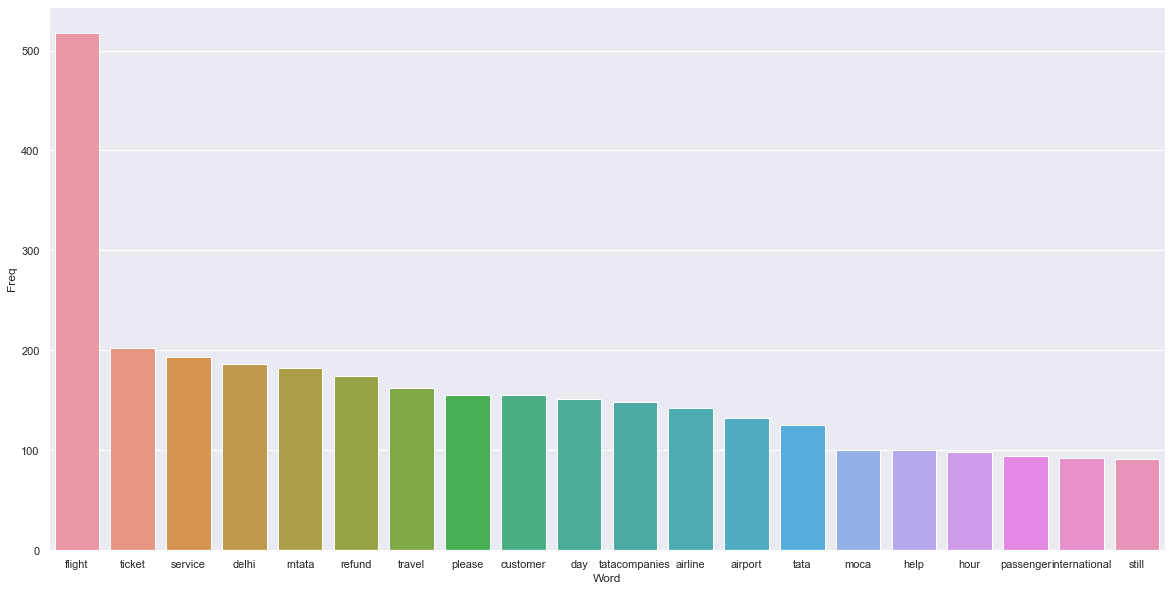

In [16]:
#Barplot of most freq words
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="Word", y="Freq",data=top_df)
plt.show()

In [17]:
#Visualise using word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from wordcloud import WordCloud

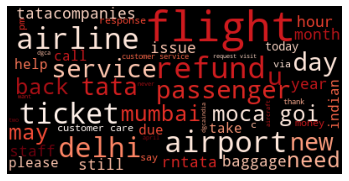

In [44]:
# Create and generate a word cloud image:
wordcloud = WordCloud(
                          background_color='black',
                          colormap="Reds",
                          stopwords=stop_words,
                          max_words=50,
                          max_font_size=50, 
                          random_state=42,
                          ).generate(str(corpus))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("wordAirIndia.png", dpi=900)

In [19]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=15)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

                  Bi-gram  Freq
0                moca goi    70
1              visit http    53
2           customer care    46
3        customer service    44
4           request visit    41
5    international travel    37
6        travel guideline    36
7   updated international    32
8               aiesl mro    31
9               new delhi    30
10   rntata tatacompanies    29
11           aai official    28
12               last day    28
13         flight delayed    25
14            flight http    25


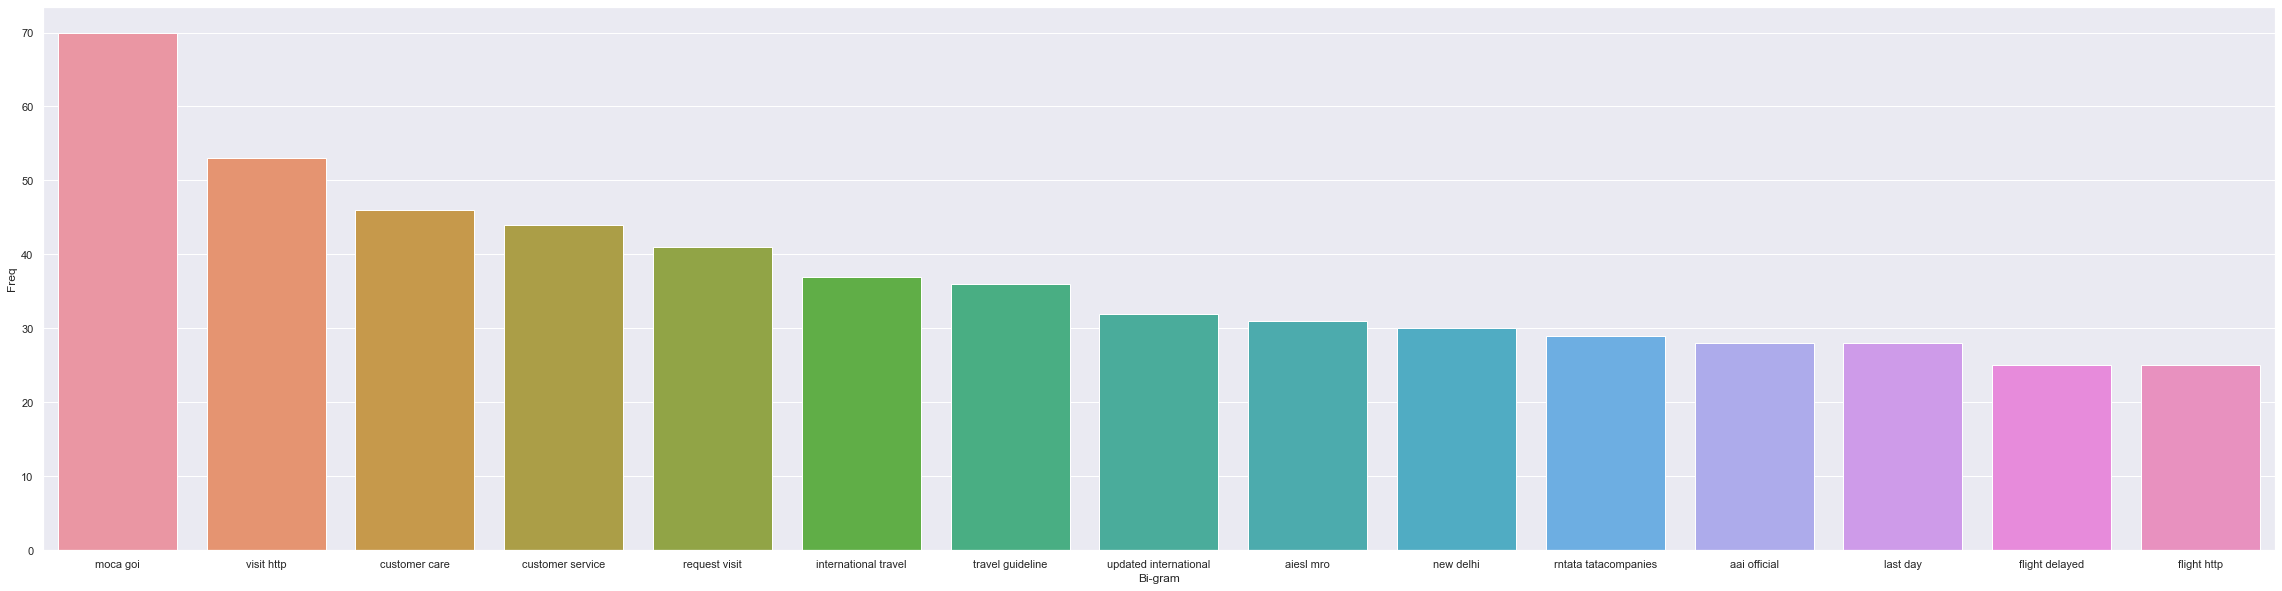

<Figure size 2880x720 with 0 Axes>

In [25]:
#Barplot of most freq words
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(40,10)})
sns.barplot(x="Bi-gram", y="Freq",data=top2_df)
plt.show()
plt.figure(figsize=(40,10)) 
fig = plt.figure(1)
fig.savefig("bigrambarplot.png")

In [26]:
## Applying tf-idf vectoriser to the corpus
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the tf-idf model
tfv = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2), min_df = 0.00001)

In [27]:
# tokenize and build vocab
tfmat = tfv.fit_transform(corpus)
tfmat.shape

(2290, 27767)

In [28]:
feature_names=tfv.get_feature_names()

In [29]:
#Remove sparsity
dense = tfmat.todense()

In [30]:
#Convert the matrix to a list
corpus1 = dense[0].tolist()[0]

In [31]:
#Create a list of feature number and tf idf score - using pair iteration in list
phrase_scores = [pair for pair in zip(range(0, len(corpus1)), corpus1) if pair[1] > 0]

In [32]:
#Sort by second item in list - -1 for descending order
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
sorted_phrase_scores[:10]

[(16965, 0.30084612147690415),
 (17414, 0.30084612147690415),
 (18280, 0.30084612147690415),
 (21948, 0.30084612147690415),
 (25804, 0.30084612147690415),
 (25805, 0.30084612147690415),
 (27122, 0.30084612147690415),
 (17412, 0.28568093944174877),
 (254, 0.2539903548912729),
 (21941, 0.2186656575575966)]

In [33]:
#Get word instead of word id with score
phrase1=[]
scores=[]
for phrase, score in [(feature_names[word_id], score) 
                      for (word_id, score) in sorted_phrase_scores][:20]:
   print('{0: <20} {1}'.format(phrase, score))
   phrase1.append(phrase)
   scores.append(score)

official usandindia  0.30084612147690415
painful worst        0.30084612147690415
pmoindia aai         0.30084612147690415
shame painful        0.30084612147690415
usandindia           0.30084612147690415
usandindia shame     0.30084612147690415
worst act            0.30084612147690415
painful              0.28568093944174877
act                  0.2539903548912729
shame                0.2186656575575966
aai official         0.20082777157045587
aai                  0.1971459217789106
pmoindia             0.18045391791480356
worst                0.17490272164595747
official             0.17363473781170166


In [34]:
tweets_df3=pd.DataFrame({'Words':np.array(phrase1),'TFID_Scores':np.array(scores)})

In [35]:
tweets_df3

,Words,TFID_Scores
0,official usandindia,0.300846
1,painful worst,0.300846
2,pmoindia aai,0.300846
3,shame painful,0.300846
4,usandindia,0.300846
5,usandindia shame,0.300846
6,worst act,0.300846
7,painful,0.285681
8,act,0.253990
9,shame,0.218666


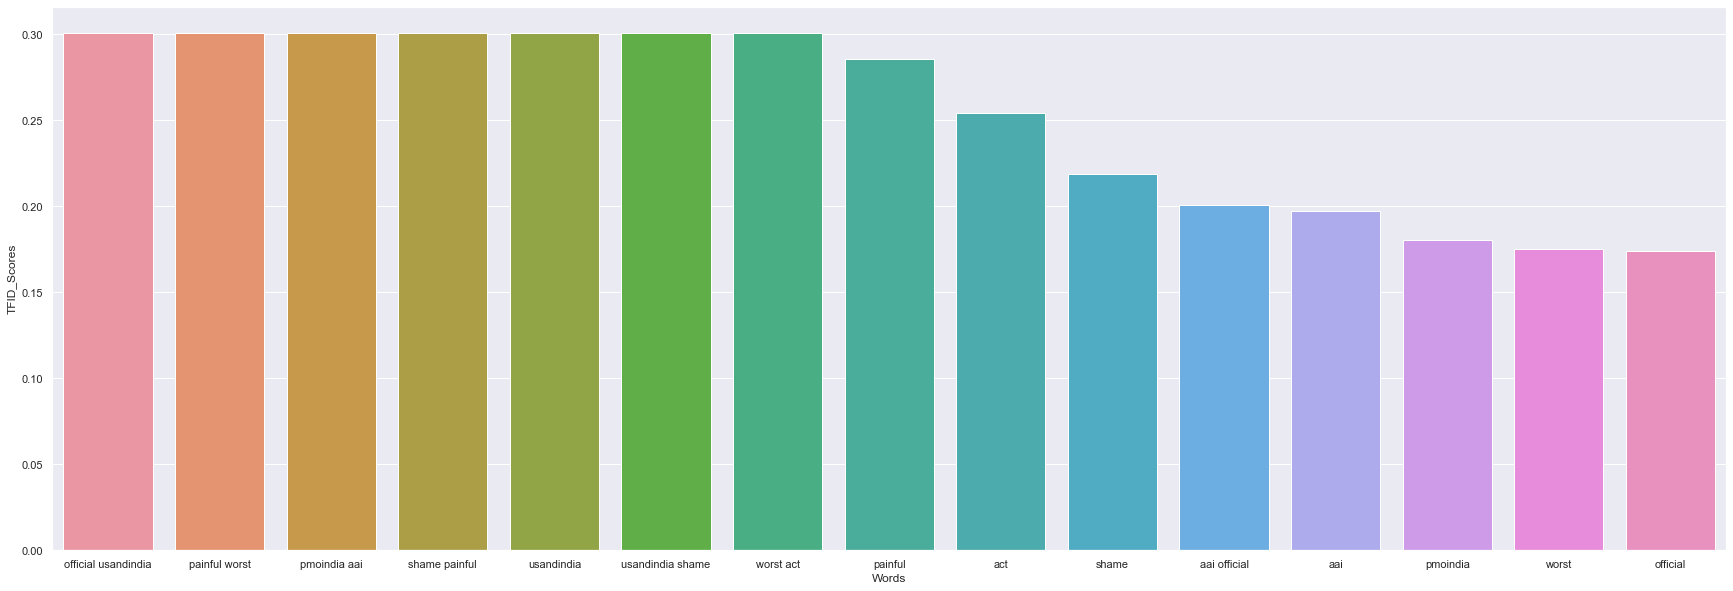

In [36]:
#Barplot of most freq words
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(x="Words", y="TFID_Scores",data=tweets_df3)
plt.show()